In [1]:
import mlxtend       

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
df=pd.read_csv('Online retail.csv',header=None,names=['items'])

In [4]:
df

,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [5]:
df1=df['items'].str.split(",",expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
# Basic Analysis
df1.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
df1.shape

(7501, 20)

In [8]:
df1.size

150020

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [10]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [11]:
# Visualising item's frequencies

In [12]:
df1.stack()

0     0             shrimp
      1            almonds
      2            avocado
      3     vegetables mix
      4       green grapes
                ...       
7499  1          green tea
7500  0               eggs
      1    frozen smoothie
      2        yogurt cake
      3     low fat yogurt
Length: 29363, dtype: object

In [13]:
df1.stack().value_counts(normalize=True)

mineral water    0.060893
eggs             0.045908
spaghetti        0.044478
french fries     0.043660
chocolate        0.041889
                   ...   
bramble          0.000477
cream            0.000238
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

In [14]:
sum(df1.stack().value_counts(normalize=True))

1.0

<Axes: >

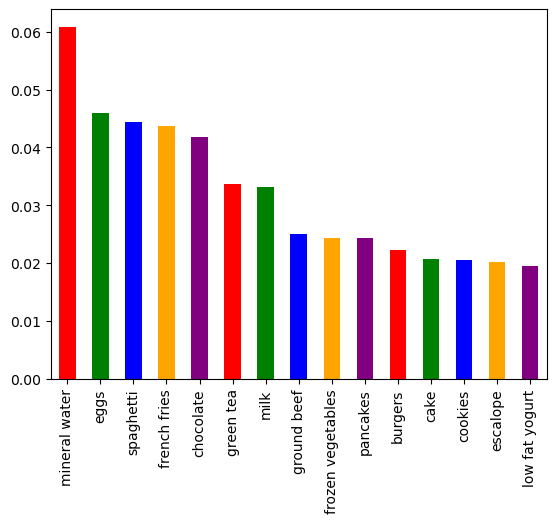

In [15]:
c=['red','green','blue','orange','purple']
df1.stack().value_counts(normalize=True)[:15].plot(kind='bar',color=c)

<Axes: >

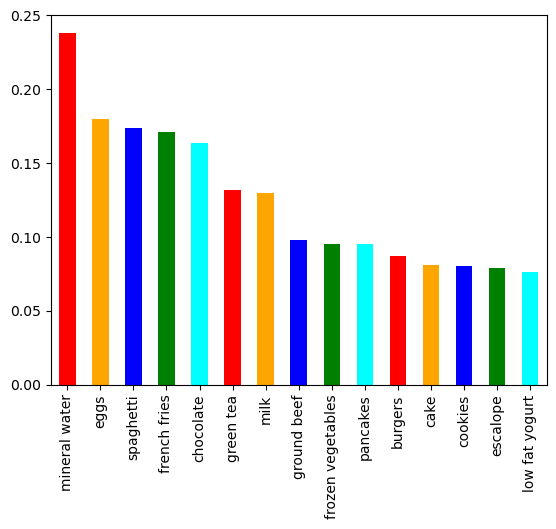

In [16]:
c=['red','orange','blue','green','cyan'] #frequncies
df1.stack().value_counts().apply(lambda item: item / df1.shape[0])[:15].plot(kind='bar',color=c)

In [17]:
# Data formating

In [19]:
transactions=[]
for i in range(df1.shape[0]):
    row=df1.iloc[i].dropna().tolist()
    transactions.append(row)

In [20]:
df1.iloc[1].dropna().tolist()

['burgers', 'meatballs', 'eggs']

In [21]:
transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [22]:
# Building the model

In [23]:
from apyori import apriori

In [24]:
rules=apriori(transactions=transactions,min_support=0.002,min_confedence=0.4,min_lift=1,min_length=0,max_length=0)
results=list(rules)

In [25]:
results[0]

RelationRecord(items=frozenset({'almonds'}), support=0.020397280362618318, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'almonds'}), confidence=0.020397280362618318, lift=1.0)])

In [26]:
results[0][0]

frozenset({'almonds'})

In [27]:
results[0][1]

0.020397280362618318

In [28]:
results[0][2]

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'almonds'}), confidence=0.020397280362618318, lift=1.0)]

In [29]:
#Organizing the Model's output

In [30]:
def inspect(results):
  item_sets = []
  supports = []
  lhs = []
  rhs = []
  confidences = []
  lifts = []
  for result in results:
    for subset in result[2]:
      item_sets.append(tuple(result[0]))
      supports.append(result[1])
      lhs.append(tuple(subset[0]))
      rhs.append(tuple(subset[1]))
      confidences.append(subset[2])
      lifts.append(subset[3])
  return list(zip(item_sets,lhs,rhs,supports,confidences,lifts))

results_df=pd.DataFrame(inspect(results),
                        columns = ['Item Set','Left Hand Side','Right Hand Side','Support','Confidence','Lift'])

In [31]:
results_df

,Item Set,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,"(almonds,)",(),"(almonds,)",0.020397,0.020397,1.000000
1,"(antioxydant juice,)",(),"(antioxydant juice,)",0.008932,0.008932,1.000000
2,"(asparagus,)",(),"(asparagus,)",0.004666,0.004666,1.000000
3,"(avocado,)",(),"(avocado,)",0.033329,0.033329,1.000000
4,"(babies food,)",(),"(babies food,)",0.004533,0.004533,1.000000
...,...,...,...,...,...,...
12460,"(soup, mineral water, spaghetti, pancakes)","(soup, spaghetti)","(mineral water, pancakes)",0.002266,0.158879,4.710465
12461,"(soup, mineral water, spaghetti, pancakes)","(soup, mineral water, pancakes)","(spaghetti,)",0.002266,0.531250,3.051230
12462,"(soup, mineral water, spaghetti, pancakes)","(spaghetti, mineral water, pancakes)","(soup,)",0.002266,0.197674,3.912284
12463,"(soup, mineral water, spaghetti, pancakes)","(soup, mineral water, spaghetti)","(pancakes,)",0.002266,0.303571,3.193674


In [32]:
results_df.sort_values('Lift',ascending=False)

,Item Set,Left Hand Side,Right Hand Side,Support,Confidence,Lift
7392,"(escalope, mushroom cream sauce, pasta)","(escalope, mushroom cream sauce)","(pasta,)",0.002533,0.441860,28.088096
7391,"(escalope, mushroom cream sauce, pasta)","(pasta,)","(escalope, mushroom cream sauce)",0.002533,0.161017,28.088096
7393,"(escalope, mushroom cream sauce, pasta)","(escalope, pasta)","(mushroom cream sauce,)",0.002533,0.431818,22.650826
7390,"(escalope, mushroom cream sauce, pasta)","(mushroom cream sauce,)","(escalope, pasta)",0.002533,0.132867,22.650826
7394,"(escalope, mushroom cream sauce, pasta)","(mushroom cream sauce, pasta)","(escalope,)",0.002533,0.950000,11.976387
...,...,...,...,...,...,...
2453,"(yams, ground beef)",(),"(yams, ground beef)",0.002666,0.002666,1.000000
2450,"(whole wheat rice, ground beef)",(),"(whole wheat rice, ground beef)",0.008132,0.008132,1.000000
9153,"(oil, mineral water, ground beef)",(),"(oil, mineral water, ground beef)",0.002133,0.002133,1.000000
2447,"(whole wheat pasta, ground beef)",(),"(whole wheat pasta, ground beef)",0.004533,0.004533,1.000000


In [33]:
# Lift is a measure of the strength of the association between two items,taking into account the frequency of both items in the dataset.
#lift = (No.of times items X & Y occured)/(Total occurance of X)*(Total occurance of Y)
#High lift value indicates that the association rule is more significant,it suggests that the two items are highly dependent on each other
#Lift is important measure in association rule mining ,it provides away to distinguish between significant and insignificant association rules
# Support  refers to the percentage of transcactions in the dataset that contain a particuar item or set of items
#Confidence refers to the percentage of transactions that contain a partcuar item or set of items,given that another item or set of items is also present
# Support= No of times items X&Y occured/(Total no of transactions)
#Confidence=No.of times items X&Y occured/(Total occurance of X)
#challenges:
#choosing the right metrics are Support,Confidene,Lift
#to set the thresholds
#Deal with missing values,handling noise,outliers
#Managing the complexity